# Case Técnico BIX: Consultoria de dados para uma empresa terceirizada de transporte de caminhões.

## Planejamento da Solução

### Entrada



#### Entendimento de Negócio

**Qual é o problema de negócio?**

* Uma empresa terceirizada de transporte de caminhões deseja diminuir os gastos de manutenção dos sistemas de ar de sua frota de veículos. Foi observado que o valor gasto com esse sistema vem crescendo ao longo dos últimos anos mesmo mantendo o tamanho de sua frota constante. Para resolver esse problema, podemos fazer a seguinte análise:

    1. Realizar a classificação do sistema de ar de caminhões baseado em suas características fornecida pelos dados do setor de manutenção e assim reduzir os gastos com esse sistema ao longo dos anos.
    2. Analisar quais são as variáveis que influenciam esse problema no sistema de ar da frota de caminhões.


### Saída

* Qual o formato de entrega da solução ? 

    - Jupyter Notebooks, onde o projeto foi desenvolvido por meio de ciclos, com objetivo de gerenciar e planejar os próximos passos e manter uma entrega contínua de valor para a empresa. As respostas dos problemas de negócio podem ser encontradas no último notebook do ciclo do projeto(ciclo04_FINAL).
    
    - Modelo em produção com API no Render e disponível por meio de uma planilha no Google Spreadsheets, onde foi criado um script para a realização da classificação dos sistemas de ar. O endereço da planilha Google SpreadSheet está localizado na página do repositório.
    
    - Documento em formato PDF com as respostas referentes às perguntas do desafio.


### Metodologia
- CRISP-DM, metodologia ágil para desenvolvimento de projetos de ciência de dados ( método cíclico ).
- Abordagem de classificação.

### Ferramentas Utilizadas
Python 3.10.6, Jupyter-Lab, Git, Github, Poetry.

## Implementações Realizadas na Sprint

### Ciclo 1

* Entendimento do Problema de Negócio e Planejamento da Solução.
* Importações de Bibliotecas e Funções Auxiliares.
* Leitura dos Dados.
* Descrição breve dos dados.
* Análise da distribuição da classe de dados.
* Breve EDA das variáveis.
* Preparação dos Dados para Modelagem.
* Aplicação de um modelo baseline de ML e estudo de algumas métricas.
* Resultados de negócio gerado pelo modelo baseline

# 0.0 Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from sklearn import model_selection as ms

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,precision_score,f1_score, average_precision_score
    
from sklearn.neighbors       import KNeighborsClassifier




from numpy import set_printoptions
set_printoptions(suppress = True)

# 0.1 Auxiliar Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display(HTML ('<style>.container {width:100% !important;} </style>') )
    pd.options.display.max_columns=None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr',False)
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    
    sns.set()
    
jupyter_settings()


# 0.2 Loading Data

In [5]:
# Analysing Data
df_raw_prev = pd.read_csv('../data/air_system_previous_years.csv')
df_raw_present =  pd.read_csv('../data/air_system_present_year.csv')

In [6]:
df_raw_prev.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [7]:
df_raw_present.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,387

# 1.0 Data Description

In [8]:
df1 = df_raw_prev.copy()
df1_test = df_raw_present.copy()

## 1.1 Data Columns

In [9]:
df1.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [10]:
df1_test.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

## 1.2 Data Dimension 


In [11]:
print('Formato do dataset de treino: {} linhas e {} colunas'.format(df1.shape[0], df1.shape[1]))

Formato do dataset de treino: 60000 linhas e 171 colunas


## 1.3 Data Types

In [12]:
df1.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
av_000    object
ax_000    object
ay_000    object
ay_001    object
ay_002    object
ay_003    object
ay_004    object
ay_005    object
ay_006    object
ay_007    object
ay_008    object
ay_009    object
az_000    object
az_001    object
az_002    object
az_003    object
az_004    object
az_005    object
az_006    object
az_007    object
az_008    object
az_009    object
ba_000    object
ba_001    object
ba_002    object
ba_003    object
ba_004    object
ba_005    obje

Nessa etapa podemos observar que praticamente todas variáveis estão como tipo de objeto (menos a 1º) , portanto precisamos transformas elas em um tipo númerico visto que só possuímos numeros como valores.

## 1.4 Check NA / Check Duplicated Rows

In [13]:
df1 = df1.replace('na',np.nan)
df1_test = df1_test.replace('na',np.nan)

In [14]:
# Transform object features as float
df1 = df1.astype({col: float for col in df1.columns[1:]})
df1_test = df1_test.astype({col: float for col in df1_test.columns[1:]})

In [15]:
df1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0000,NaN,2130706438.0000,280.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37250.0000,1432864.0000,3664156.0000,1007684.0000,25896.0000,0.0000,2551696.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4933296.0000,3655166.0000,1766008.0000,1132040.0000,0.0000,0.0000,0.0000,0.0000,1012.0000,268.0000,0.0000,0.0000,0.0000,0.0000,0.0000,469014.0000,4239660.0000,703300.0000,755876.0000,0.0000,5374.0000,2108.0000,4114.0000,12348.0000,615248.0000,5526276.0000,2378.0000,4.0000,0.0000,0.0000,2328746.0000,1022304.0000,415432.0000,287230.0000,310246.0000,681504.0000,1118814.0000,3574.0000,0.0000,0.0000,6700214.0000,0.0000,10.0000,108.0000,50.0000,2551696.0000,97518.0000,947550.0000,799478.0000,330760.0000,353400.0000,299160.0000,305200.0000,283680.0000,NaN,NaN,NaN,178540.0000,76698.0800,6700214.0000,6700214.0000,6599892.0000,43566.0000,68656.0000,54064.0000,638360.0000,6167850.0000,1209600.0000,246244.0000,2.0000,96.0000,0.0000,5245752.0000,0.0000,916567.6800,6.0000,1924.0000,0.0000,0.0000,0.0000,118196.0000,1309472.0000,3247182.0000,1381362.0000,98822.0000,11208.0000,1608.0000,220.0000,240.0000,6700214.0000,NaN,10476.0000,1226.0000,267998.0000,521832.0000,428776.0000,4015854.0000,895240.0000,26330.0000,118.0000,0.0000,532.0000,734.0000,4122704.0000,51288.0000,0.0000,532572.0000,0.0000,18.0000,5330690.0000,4732.0000,1126.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,62282.0000,85908.0000,32790.0000,0.0000,0.0000,202710.0000,37928.0000,14745580.0000,1876644.0000,0.0000,0.0000,0.0000,0.0000,2801180.0000,2445.8000,2712.0000,965866.0000,1706908.0000,1240520.0000,493384.0000,721044.0000,469792.0000,339156.0000,157956.0000,73224.0000,0.0000,0.0000,0.0000
1,neg,33058.0000,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18254.0000,653294.0000,1720800.0000,516724.0000,31642.0000,0.0000,1393352.0000,0.0000,68.0000,0.0000,0.0000,0.0000,2560898.0000,2127150.0000,1084598.0000,338544.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,71510.0000,772720.0000,1996924.0000,99560.0000,0.0000,7336.0000,7808.0000,13776.0000,13086.0000,1010074.0000,1873902.0000,14726.0000,6.0000,0.0000,0.0000,1378576.0000,447166.0000,199512.0000,154298.0000,137280.0000,138668.0000,165908.0000,229652.0000,87082.0000,4708.0000,3646660.0000,86.0000,454.0000,364.0000,350.0000,1393352.0000,49028.0000,688314.0000,392208.0000,341420.0000,359780.0000,366560.0000,NaN,NaN,NaN,NaN,NaN,6700.0000,33057.5100,3646660.0000,3646660.0000,3582034.0000,17733.0000,260120.0000,115626.0000,6900.0000,2942850.0000,1209600.0000,0.0000,NaN,NaN,NaN,2291079.3600,0.0000,643536.9600,0.0000,0.0000,0.0000,0.0000,38.0000,98644.0000,1179502.0000,1286736.0000,336388.0000,36294.0000,5192.0000,56.0000,NaN,0.0000,3646660.0000,NaN,6160.0000,796.0000,164860.0000,350066.0000,272956.0000,18

In [16]:
df1.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
az_007      671
az_008      671
az_009      671
ba_000      688
ba_001      688
ba_002      688
ba_003      688
ba_004      688
ba_005      688
ba_006      688
ba_007      688
ba_008      688
ba_009  

In [17]:
# CHECK DUPLICATED ROWS ON TRAIN
duplicated_train = df1[df1.duplicated()]
duplicated_train


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000


In [18]:
# CHECK DUPLICATED ROWS ON TEST
duplicated_test = df1_test[df1_test.duplicated()]
duplicated_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000


## 1.5 Checking Duplicated Features and columns with 1 val 

In [19]:
#Check duplicated rows in train
feature_duplicated_train = df1.T.drop_duplicates().T

#Check duplicated columns in test
feature_duplicated_teste = df1_test.T.drop_duplicates().T

In [20]:
df1.shape

(60000, 171)

In [21]:
feature_duplicated_train.shape

(60000, 171)

In [22]:
df1_test.shape

(16000, 171)

In [23]:
feature_duplicated_teste.shape

(16000, 171)

Como podemos observar nenhuma coluna foi dropada, portanto não possuímos colunas duplicadas.

## 1.6 Replace / Fill NA

Como não temos maiores informações sobre as features devido a sua anonimidade, optaremos então por substituir todos os valores NA por **0** para não perdemos muitos dados ( outra opcao seria dropar os na's ).

In [24]:
df1 = df1.replace(np.nan,0)
df1_test = df1_test.replace(np.nan,0)

## 1.7 Descriptive Statistics

In [25]:
num_attributes = df1.select_dtypes(include=['float64'])

In [26]:
num_attributes.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0000,0.0000,2130706438.0000,280.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37250.0000,1432864.0000,3664156.0000,1007684.0000,25896.0000,0.0000,2551696.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4933296.0000,3655166.0000,1766008.0000,1132040.0000,0.0000,0.0000,0.0000,0.0000,1012.0000,268.0000,0.0000,0.0000,0.0000,0.0000,0.0000,469014.0000,4239660.0000,703300.0000,755876.0000,0.0000,5374.0000,2108.0000,4114.0000,12348.0000,615248.0000,5526276.0000,2378.0000,4.0000,0.0000,0.0000,2328746.0000,1022304.0000,415432.0000,287230.0000,310246.0000,681504.0000,1118814.0000,3574.0000,0.0000,0.0000,6700214.0000,0.0000,10.0000,108.0000,50.0000,2551696.0000,97518.0000,947550.0000,799478.0000,330760.0000,353400.0000,299160.0000,305200.0000,283680.0000,0.0000,0.0000,0.0000,178540.0000,76698.0800,6700214.0000,6700214.0000,6599892.0000,43566.0000,68656.0000,54064.0000,638360.0000,6167850.0000,1209600.0000,246244.0000,2.0000,96.0000,0.0000,5245752.0000,0.0000,916567.6800,6.0000,1924.0000,0.0000,0.0000,0.0000,118196.0000,1309472.0000,3247182.0000,1381362.0000,98822.0000,11208.0000,1608.0000,220.0000,240.0000,6700214.0000,0.0000,10476.0000,1226.0000,267998.0000,521832.0000,428776.0000,4015854.0000,895240.0000,26330.0000,118.0000,0.0000,532.0000,734.0000,4122704.0000,51288.0000,0.0000,532572.0000,0.0000,18.0000,5330690.0000,4732.0000,1126.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,62282.0000,85908.0000,32790.0000,0.0000,0.0000,202710.0000,37928.0000,14745580.0000,1876644.0000,0.0000,0.0000,0.0000,0.0000,2801180.0000,2445.8000,2712.0000,965866.0000,1706908.0000,1240520.0000,493384.0000,721044.0000,469792.0000,339156.0000,157956.0000,73224.0000,0.0000,0.0000,0.0000
1,33058.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18254.0000,653294.0000,1720800.0000,516724.0000,31642.0000,0.0000,1393352.0000,0.0000,68.0000,0.0000,0.0000,0.0000,2560898.0000,2127150.0000,1084598.0000,338544.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,71510.0000,772720.0000,1996924.0000,99560.0000,0.0000,7336.0000,7808.0000,13776.0000,13086.0000,1010074.0000,1873902.0000,14726.0000,6.0000,0.0000,0.0000,1378576.0000,447166.0000,199512.0000,154298.0000,137280.0000,138668.0000,165908.0000,229652.0000,87082.0000,4708.0000,3646660.0000,86.0000,454.0000,364.0000,350.0000,1393352.0000,49028.0000,688314.0000,392208.0000,341420.0000,359780.0000,366560.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6700.0000,33057.5100,3646660.0000,3646660.0000,3582034.0000,17733.0000,260120.0000,115626.0000,6900.0000,2942850.0000,1209600.0000,0.0000,0.0000,0.0000,0.0000,2291079.3600,0.0000,643536.9600,0.0000,0.0000,0.0000,0.0000,38.0000,98644.0000,1179502.0000,1286736.0000,336388.0000,36294.0000,5192.0000,56.0000,0.0000,0.0000,3646660.0000,0.0000,6160.0000,796.0000,1

In [27]:
# Central Tendency - Media, Mediana 
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion std, min, max, range,skew,kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [28]:
# Concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d5,d6]).T.reset_index()
m.columns=['attributes','min','max','range','mean','median','skew','kurtosis']

In [29]:
m.head()

,attributes,min,max,range,mean,median,skew,kurtosis
0,aa_000,0.0000,2746564.0000,2746564.0000,59336.4996,30776.0000,6.1158,48.2974
1,ab_000,0.0000,204.0000,204.0000,0.1625,0.0000,57.0362,5119.1661
2,ac_000,0.0000,2130706796.0000,2130706796.0000,336225803.5780,120.0000,1.8774,1.5247
3,ad_000,0.0000,8584297742.0000,8584297742.0000,143407.0840,42.0000,244.9490,59999.9992
4,ae_000,0.0000,21050.0000,21050.0000,6.5350,0.0000,92.5316,11228.4059


# 2.0 Feature Engineering

In [30]:
df2 = df1.copy()

# 3.0 Variables Filtering

In [31]:
df3 = df2.copy()

# 4.0 EDA

In [32]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### 4.1.1 Response Variable

In [33]:
df4['class'] = df4['class'].apply(lambda x: 1 if x == 'pos' else 0)

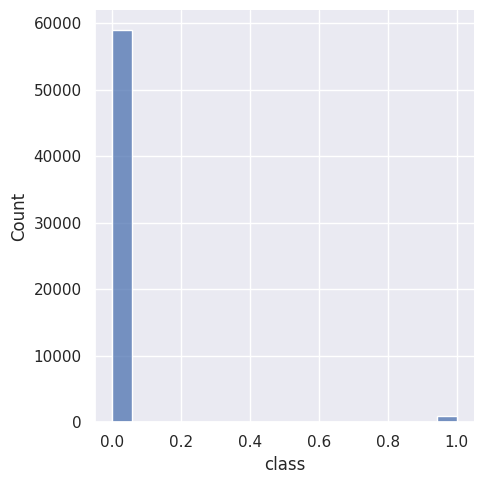

In [34]:
sns.displot(df4['class'],kde=False);

In [35]:
df4['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

- 59000 caminhões com outros tipos de manutenção.
- 1000 caminhões com manutenção de sistema de ar.

Classes Muito desbalanceadas, vamos prosseguir sem alteração por enquanto.

### 4.1.2 Numeric Variables Analysis

Devido a grande quantidade de features do nosso dataset, fica mais difícil visualizarmos as suas distribuições e tendências. Para fins exploratórios iremos selecionar algumas variáveis que possam ter uma relação semelhante.

In [36]:
analyze = df4.describe()


Selecionaremos algumas variáveis cuja a media de seus valores não é tão alto.

In [37]:
analyze = df4.describe()
df_T = analyze.T

media_baixa = df_T.loc[df_T['mean'] < 100]
lista_colunas = media_baixa.index


In [38]:
lista_colunas

Index(['class', 'ab_000', 'ae_000', 'af_000', 'ar_000', 'az_009', 'bf_000',
       'cg_000', 'ch_000', 'cr_000', 'da_000', 'db_000', 'dj_000', 'dz_000',
       'ea_000', 'ef_000', 'eg_000'],
      dtype='object')

In [39]:
df_aux1 = df4[lista_colunas]

In [40]:
df_aux1.head()

,class,ab_000,ae_000,af_000,ar_000,az_009,bf_000,cg_000,ch_000,cr_000,da_000,db_000,dj_000,dz_000,ea_000,ef_000,eg_000
0,0,0.0000,0.0000,0.0000,0.0000,0.0000,50.0000,96.0000,0.0000,0.0000,0.0000,18.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0,0.0000,0.0000,0.0000,0.0000,0.0000,350.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,124.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0,0.0000,0.0000,10.0000,0.0000,0.0000,0.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,32.0000
4,0,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,152.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


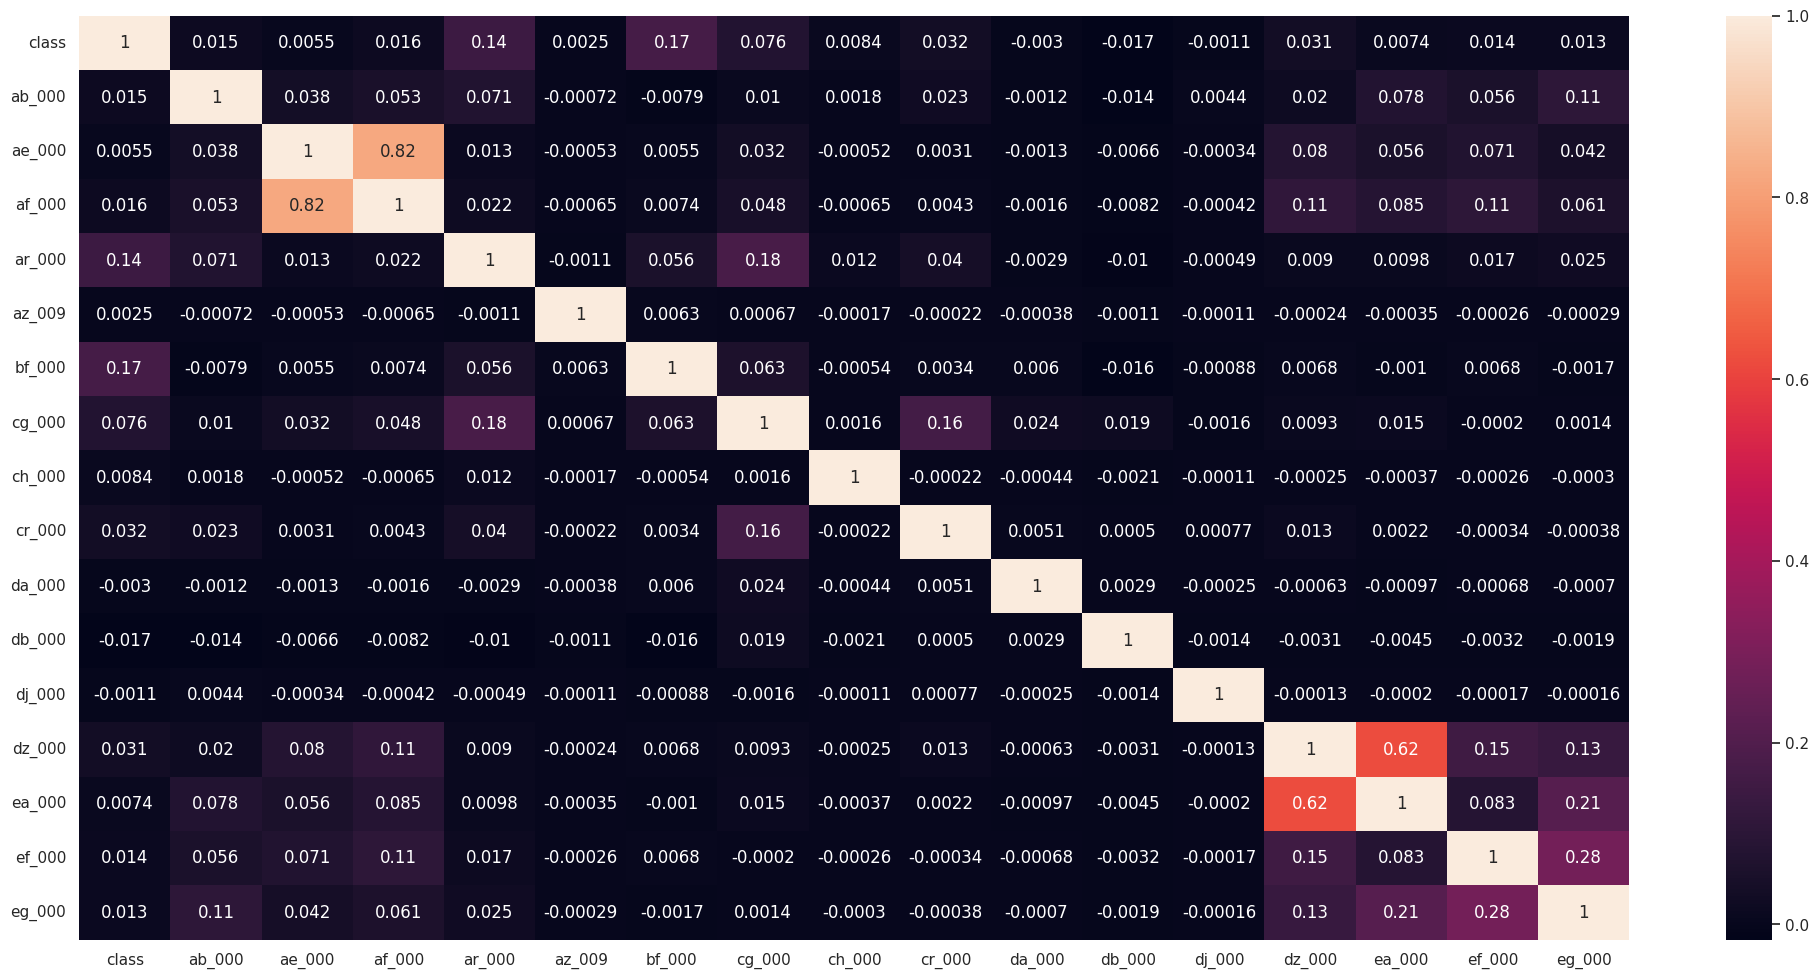

In [41]:
correlation = df_aux1.corr(method='pearson')
sns.heatmap(correlation,annot=True);

Por meio da tabela acima conseguimos perceber que existem algumas variáveis que são altamente correlacionadas.

Variáveis Mais Correlacionadas entre si: af_000 e ae_000 | ea_000 e dz_000

Também podemos observar que pelos features selecionadas uma forte correlação delas com a variável resposta (class) por enquanto.

### 4.1.3 Distribution of Variables

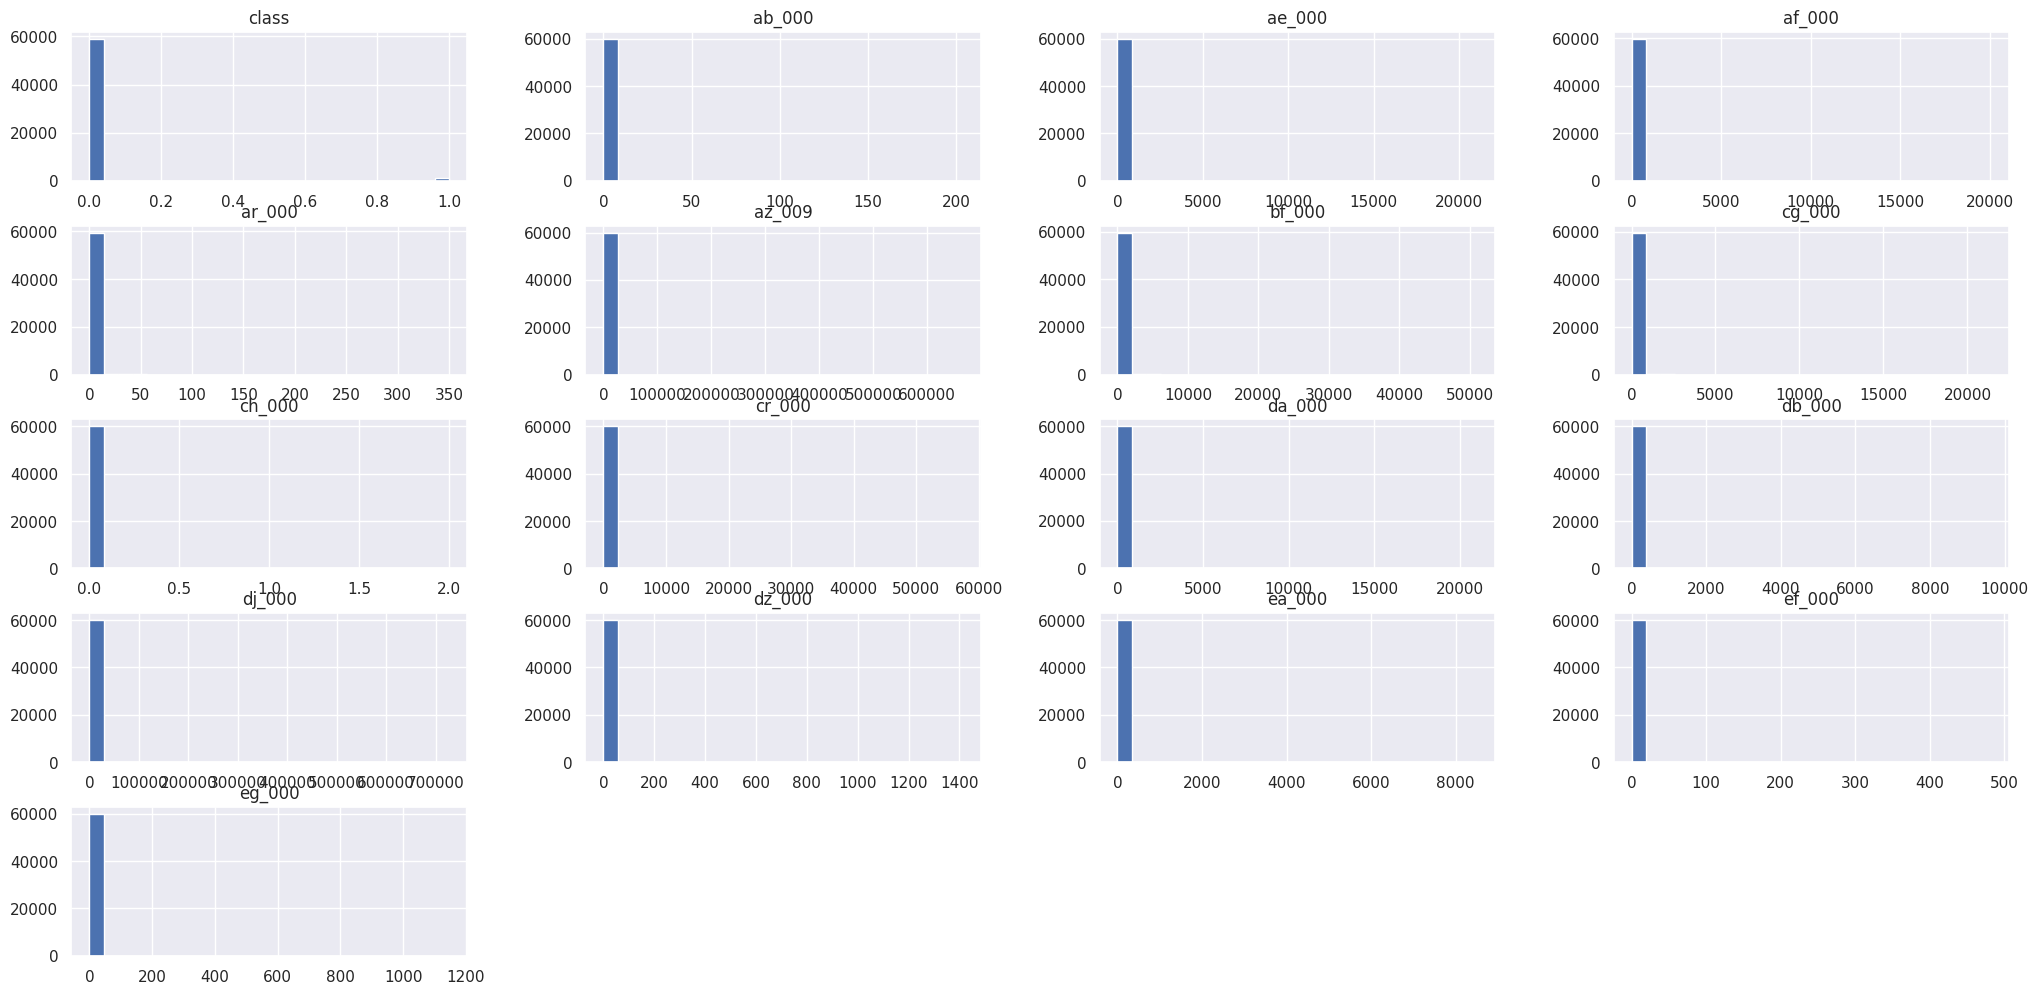

In [42]:
df_aux1.hist(bins=25);

Como podemos ver as distribuições estão muito concentradas em valores 0. Como não conseguimos tirar algum conhecimento sobre a análise da distribuiçao prosseguiremos com projeto.

# 5.0 Data Preparation

In [47]:
df5 = df4.copy()

In [48]:
X = df5.drop('class',axis=1)
y = df5['class'].copy()

In [49]:
x_train, x_validation, y_train, y_validation = ms.train_test_split(X,y,test_size=0.20,random_state=42)

In [50]:
x_train.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
48572,18.0000,0.0000,22.0000,20.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,1916.0000,2956.0000,0.0000,0.0000,0.0000,606.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6408.0000,4912.0000,31398.0000,492.0000,0.0000,0.0000,0.0000,0.0000,10.0000,22.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,960.0000,3922.0000,0.0000,98.0000,58.0000,84.0000,1010.0000,128.0000,3504.0000,0.0000,0.0000,0.0000,0.0000,3344.0000,416.0000,156.0000,94.0000,180.0000,108.0000,444.0000,62.0000,10.0000,68.0000,37822.0000,0.0000,6.0000,0.0000,0.0000,606.0000,126.0000,29982.0000,1396.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,31280.0000,17.9600,37822.0000,37822.0000,39494.0000,23.0000,10.0000,3732.0000,37700.0000,4934.0000,1209600.0000,322.0000,2.0000,0.0000,0.0000,2637.1200,286.0800,995.5200,2.0000,22.0000,0.0000,0.0000,0.0000,1272.0000,2714.0000,890.0000,6.0000,0.0000,0.0000,0.0000,0.0000,22.0000,37822.0000,0.0000,1030.0000,12.0000,18.0000,16.0000,346.0000,916.0000,2078.0000,448.0000,18.0000,0.0000,6.0000,28.0000,2530.0000,104.0000,0.0000,0.0000,0.0000,0.0000,2854.0000,32.0000,96.0000,0.0000,0.0000,280.0000,1666.0000,0.0000,0.0000,0.0000,0.0000,176.0000,0.0000,0.0000,0.0000,0.0000,62.0000,18.0000,10260.0000,1036.0000,0.0000,20.0000,0.0000,0.0000,0.0000,0.7600,44.0000,2434.0000,1962.0000,126.0000,64.0000,104.0000,154.0000,38.0000,0.0000,0.0000,0.0000,0.0000,0.0000
38696,30.0000,0.0000,42.0000,42.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,50.0000,4250.0000,3442.0000,0.0000,0.0000,0.0000,3058.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7478.0000,5016.0000,12224.0000,1182.0000,0.0000,0.0000,0.0000,0.0000,108.0000,30.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7742.0000,0.0000,0.0000,0.0000,52.0000,6.0000,10.0000,20.0000,180.0000,7432.0000,42.0000,0.0000,0.0000,0.0000,6030.0000,1288.0000,274.0000,66.0000,32.0000,18.0000,16.0000,18.0000,0.0000,0.0000,19714.0000,4.0000,20.0000,6.0000,0.0000,3058.0000,200.0000,9554.0000,2664.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12100.0000,29.5100,19714.0000,19714.0000,25582.0000,17.0000,0.0000,1882.0000,19620.0000,7742.0000,1209600.0000,618.0000,0.0000,2.0000,0.0000,4595.5200,0.0000,3117.1200,0.0000,0.0000,0.0000,0.0000,0.0000,3722.0000,3834.0000,186.0000,0.0000,0.0000,0.0000,0.0000,6.0000,36.0000,19714.0000,0.0000,68.0000,10.0000,12.0000,268.0000,506.0000,1156.0000,4324.0000,1350.0000,48.0000,0.0000,72.0000,78.0000,5032.0000,66.0000,0.0000,28.0000,0.0000,0.0000,5124.0000,56.0000,40.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,120.0000,0.0000,0.0000,0.0000,0.0000,254.0000,50.0000,520.0000,58.0000,20522.0000,32.0000,0.0000,0.0000,0.0000,43.3200,28.0000,3470.0000,3348.0000,734.0000,82.0000,102.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
13611,14.0000,0.0000,8.0000,0.0000,0.0000,0.0000,

# 6.0 Variable Selection

In [51]:
df6 = df5.copy()

# 7.0 Machine Learning Model

In [52]:
df7 = df6.copy()

## 7.1 Baseline Model - KNN

O algoritmo de Machine Learning que será utilizado como modelo baseline será o KNN (K-Nearest Neighbors, ou K-vizinhos mais próximos). 

* É um modelo baseline simples de se implementar e de fácil explicabilidade.



In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

yhat_knn = knn.predict(x_validation)
yhat_knn_proba = knn.predict_proba(x_validation)



In [54]:
## Accuracy
accuracy = accuracy_score(y_validation, yhat_knn)
recall = recall_score(y_validation,yhat_knn)
print('Accuracy: {}'.format(accuracy))
print('Recall: {}'.format(recall))



Accuracy: 0.9871666666666666
Recall: 0.47641509433962265


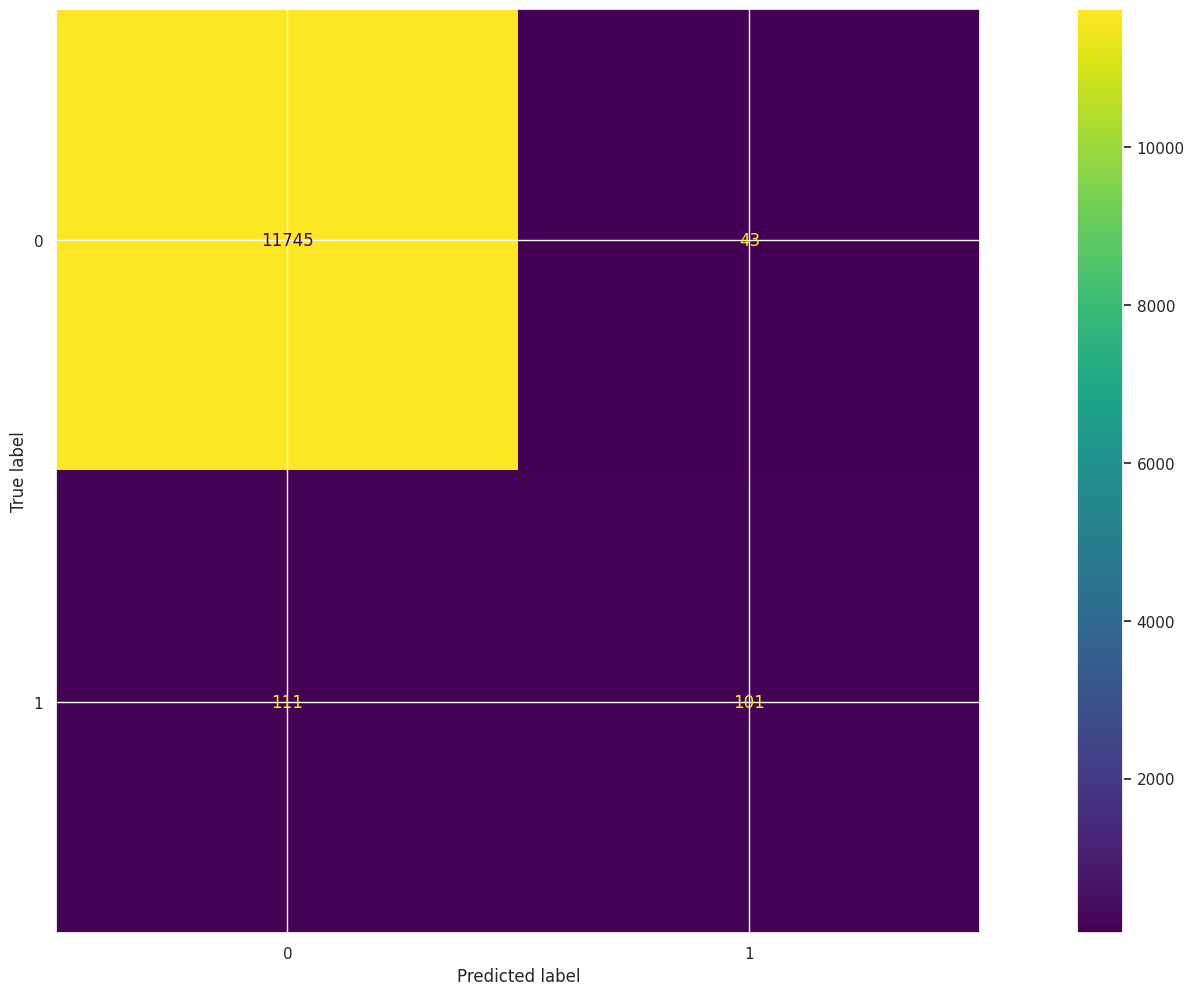

In [55]:
cm = confusion_matrix(y_validation, yhat_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

Representação da Matriz de Confusão: 

| TN          FP  |   
| FN          TP  |

A matriz de confusão expressa a relação entre as respostas reais e as preditos pelo modelo, podemos traduzir ela para o nosso problema de negócio da seguinte forma:

Custo para diferentes situações:

* True Negative (caminhao não possui problema no sistema de ar e modelo acertou): cobrado somente $10 pelos tempo gasto durante vistoria da equipe.

* False Positive (caminhao não possui problema no sistema de ar e o modelo errou): cobrado somente $10 pelos tempo gasto durante vistoria da equipe.

* True Positive (caminhao possui problema no sistema de ar e modelo acertou): $25 pela realização do serviço de reparo preventivo.

* False Negative (caminhao possui problema no sistema de ar e o modelo errou): $500 pela realização do serviço de manutenção corretiva. **(PIOR CASO)**


Portanto, podemos observar que a predição que mais prejudicaria o nosso custo seriam os **Falso Negativos**, no qual o modelo diria que o caminhão não teria problema no sistema de ar quando na verdade ele possui, gerando uma manutenção corretiva de $500 por erro.


## 7.2 Baseline Evaluation

Para problemas de Classificação nós podemos adotar diferentes métricas, entraremos em detalhes em algumas delas e após a análise do nosso problema de negócio realizaremos a
escolha ideal para o nosso projeto.

Métricas de Classificação:

* Acurácia: Nº Predicoes Corretas / Todas predicoes. PS: A acurácia é enviesada pela classe que mais temos exemplos de dados (no nosso caso classe 0). Fórmula = (TP + TN) / Total


* Precision:  Quantas Predições Corretas da Classe / Total Predições da classe.  PS: Utilizada quando trabalhamos com problemas em que um classe é muito mais importante que a outra. Como por ex a detecção de doenças. F = (TP / (TP+FP) )
  
* Recall(Sensitivity): Quantas Predicoes Classe  / Todos de Exemplos reais da Classe . PS: utilizado quando aparecimento de um exemplo real é importante pra mim e eu quero detectá-lo. F=(TP / (TP + FN) ) 


* F1_Score: Média entre Precision e Recall (Média Harmônica). F = (2 * PRECISION * Recall / Precision + Recall)
    
* Balanced Acurácia: (Pred Correta Classe 0 / Total Predição Classe 0 ) + (Pred Correta Classe B / Total Predicção Classe B) / Total Classes. 





Tendo que em vista que no nosso projeto nós queremos evitar ao máximo **Falsos Negativos** devido a seu alto custo e maximizar os True Positive, optaremos por utilizar duas métricas para comparação dos modelos:
* Recall: de todas previsões positivas, quais delas são realmente verdadeiras. (Maximizar o recall para reduzir custos $) -> Métrica voltada para o Negócio 
* AUC PR: area abaixo da precision-recall curve. (Utilizada para comparar os modelos ) -> Métrica p/ Modelo

In [57]:
recall = recall_score(y_validation, yhat_knn)
auc_pr = average_precision_score(y_validation,yhat_knn_proba[:,1])
f1score = f1_score(y_validation,yhat_knn)

print('Para nosso modelo de baseline, temos então um recall de {:.2f} e AUC PR de {:.2f}'.format(recall,auc_pr))
print('F1 Score: {:.2f}'.format(f1score))



Para nosso modelo de baseline, temos então um recall de 0.48 e AUC PR de 0.56
F1 Score: 0.57


# 8.0 Hyper Parameter Fine Tuning

# 9.0 Final Model

Como esse é o primeiro ciclo o nosso modelo baseline será o KNN da seção 7.1

## 9.1 Train + Validation Preparation

In [58]:
# Join Train + Validation for Final Training
x_train_final = pd.concat([x_train,x_validation],axis=0)
y_train_final = pd.concat([y_train,y_validation],axis=0)

## 9.2 Test Dataset Preparation 


In [59]:
df_test = pd.read_csv('../data/air_system_present_year.csv')

In [60]:
df_test['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [61]:
df_test = df_test.replace('na','0')
df_test = df_test.astype({col: float for col in df1.columns[1:]})
df_test['class'] = df_test['class'].apply(lambda x: 1 if x == 'pos' else 0)

In [62]:
x_test = df_test.drop(['class'],axis=1)
y_test = df_test['class']

In [63]:
x_test.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0000,0.0000,20.0000,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2682.0000,4736.0000,3862.0000,1846.0000,0.0000,0.0000,0.0000,3976.0000,0.0000,0.0000,0.0000,1520.0000,2374.0000,11516.0000,9480.0000,111258.0000,470.0000,0.0000,0.0000,0.0000,0.0000,58.0000,26.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13124.0000,2.0000,1956.0000,434.0000,76.0000,174.0000,190.0000,6198.0000,1148.0000,2948.0000,2.0000,0.0000,8762.0000,2566.0000,480.0000,380.0000,196.0000,516.0000,86.0000,66.0000,74.0000,0.0000,124340.0000,4.0000,6.0000,4.0000,0.0000,3976.0000,318.0000,107662.0000,3458.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,110980.0000,59.5300,124340.0000,124340.0000,184970.0000,54.0000,686.0000,12246.0000,123880.0000,13196.0000,1209600.0000,598.0000,0.0000,6.0000,0.0000,5913.6000,0.0000,5851.2000,6.0000,30.0000,0.0000,2.0000,5512.0000,4674.0000,1388.0000,1508.0000,38.0000,4.0000,0.0000,0.0000,8.0000,12.0000,124340.0000,0.0000,1550.0000,14.0000,36.0000,26.0000,920.0000,430.0000,7650.0000,2294.0000,206.0000,0.0000,22.0000,42.0000,5336.0000,1276.0000,0.0000,0.0000,0.0000,0.0000,6598.0000,70.0000,112.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,340.0000,0.0000,0.0000,1100.0000,574.0000,232.0000,66.0000,780.0000,882.0000,0.0000,4.0000,0.0000,0.0000,0.0000,465.5000,90.0000,7502.0000,3156.0000,1098.0000,138.0000,412.0000,654.0000,78.0000,88.0000,0.0000,0.0000,0.0000,0.0000
1,82.0000,0.0000,68.0000,40.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,748.0000,12594.0000,3636.0000,0.0000,0.0000,0.0000,5244.0000,0.0000,60.0000,0.0000,0.0000,0.0000,23174.0000,18166.0000,23686.0000,1270.0000,0.0000,0.0000,0.0000,0.0000,12.0000,82.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,692.0000,16286.0000,0.0000,280.0000,44.0000,50.0000,1274.0000,866.0000,3362.0000,11102.0000,0.0000,0.0000,0.0000,12564.0000,1756.0000,638.0000,276.0000,172.0000,132.0000,812.0000,308.0000,192.0000,128.0000,46894.0000,4.0000,2.0000,38.0000,0.0000,5244.0000,360.0000,20520.0000,3134.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23320.0000,81.8900,46894.0000,46894.0000,48324.0000,68.0000,0.0000,4486.0000,46480.0000,17050.0000,1209600.0000,726.0000,2.0000,4.0000,0.0000,7224.9600,0.0000,7768.3200,0.0000,42.0000,0.0000,0.0000,4.0000,7064.0000,6200.0000,2452.0000,1246.0000,12.0000,0.0000,0.0000,14.0000,54.0000,46894.0000,0.0000,2202.0000,28.0000,114.0000,350.0000,700.0000,1708.0000,9622.0000,2174.0000,80.0000,0.0000,80.0000,206.0000,7802.0000,1466.0000,0.0000,0.0000,0.0000,0.0000,7918.0000,78.0000,40.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,352.0000,0.0000,0.0000,3996.0000,584.0000,200.0000,62.0000,37580.0000,3756.0000,6368.0000,36.0000,0.0000,0.0000,0.0000,2.8600,102.0000,10040.0000,3310.0000,1068.0000,276.0000,1620.0000,116.0000,86.

### 9.3 KNN Model Applied

In [64]:
x_train_final.shape

(60000, 170)

In [65]:
x_test.shape

(16000, 170)

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_final,y_train_final)

yhat_knn = knn.predict(x_test)
yhat_knn_proba = knn.predict_proba(x_test)


In [67]:
recall = recall_score(y_test, yhat_knn)
auc_pr = average_precision_score(y_test,yhat_knn_proba[:,1])
f1score = f1_score(y_test,yhat_knn)

print('Para nosso modelo de baseline final, temos então um recall de {:.2f} e AUC PR de {:.2f}'.format(recall,auc_pr))
print('F1 Score: {:.2f}'.format(f1score))

Para nosso modelo de baseline final, temos então um recall de 0.44 e AUC PR de 0.61
F1 Score: 0.56


Para analisar o impacto real nos custos, plotaremos a confusão de matriz e calcularemos o custo gerado com nosso modelo inicial

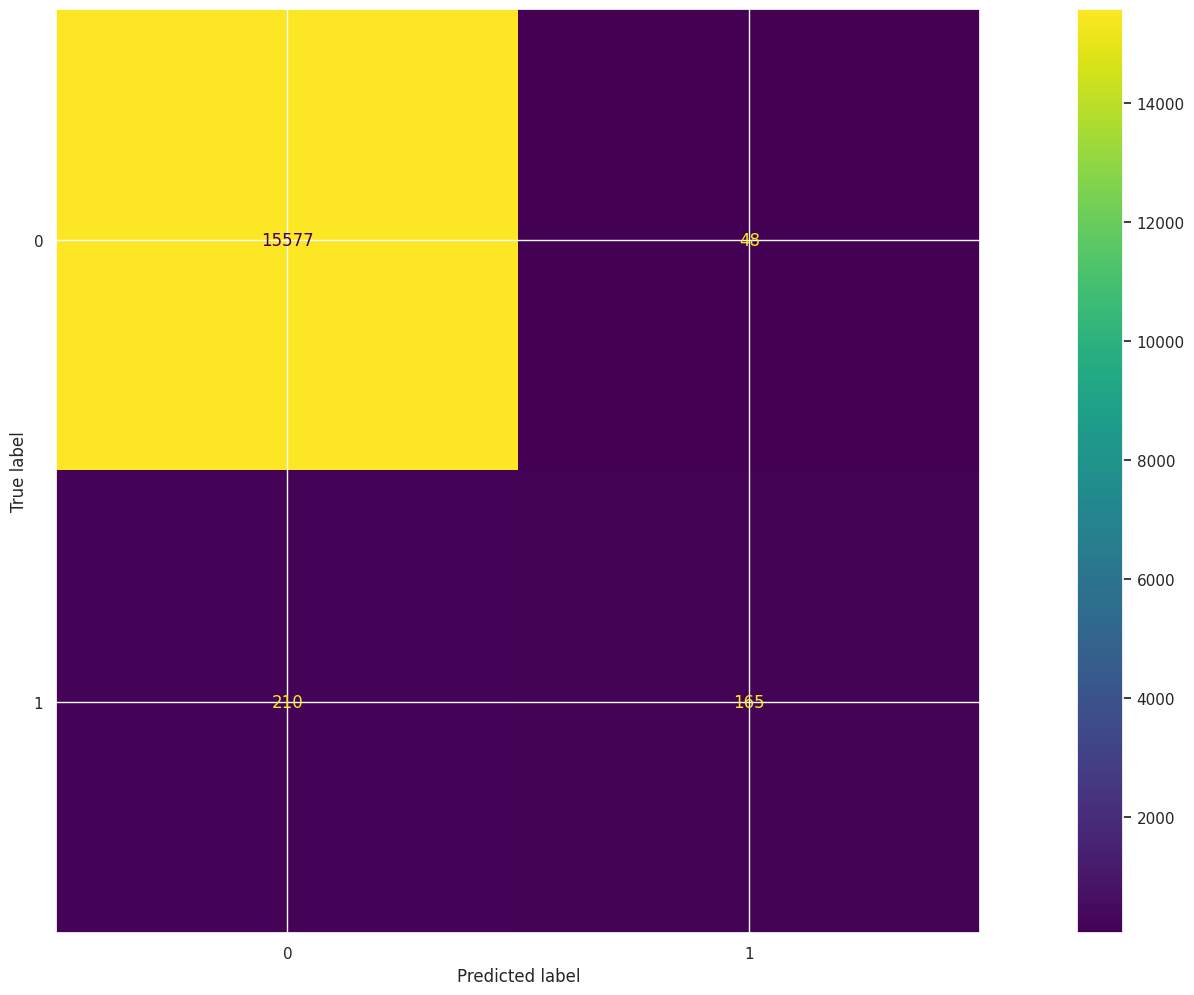

In [68]:
cm = confusion_matrix(y_test, yhat_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)

disp.plot()

# 10. Business Results

Então para o nosso modelo baseline aplicado para os dados de teste ( que são os dados representados pelos caminhoes do ano presente), temos então:
    
Da frota de 16 mil caminhões:
* 15577 não apresentam problemas no sistema de ar e nosso modelo acertou -> Logo o custo é de 10x, valor total: $155.770,00

* 210 apresentavam problemas no sistema de ar mas nosso modelo errou > Logo o custo é de 500x , valor total: $104.000.

* 48 não apresentam problemas no sistema de ar e nosso modelo errou -> Logo o custo é de 10x, valor total: $510.

* 165 apresentaram problemas no sistema de ar e o nosso modelo acertou -> Logo o custo é 25x, valor total: $4125.

In [69]:
Custo = (210*500)+(165*25)
Custo

109125

Como queremos diminuir os custos do sistema de ar na frota de caminhões, iremos analisar somente somente as classes positivas reais(1), que mostram a quantidade de caminhões com problema no sistema de ar da base de dados no ano presente.

In [70]:
df_impacto = pd.DataFrame({ 'Tipo'   : ['Modelo_Baseline_KNN','Meta'],
                            'Custo($)' : [109125,37000]})
        

In [71]:
df_impacto

,Tipo,Custo($)
0,Modelo_Baseline_KNN,109125
1,Meta,37000


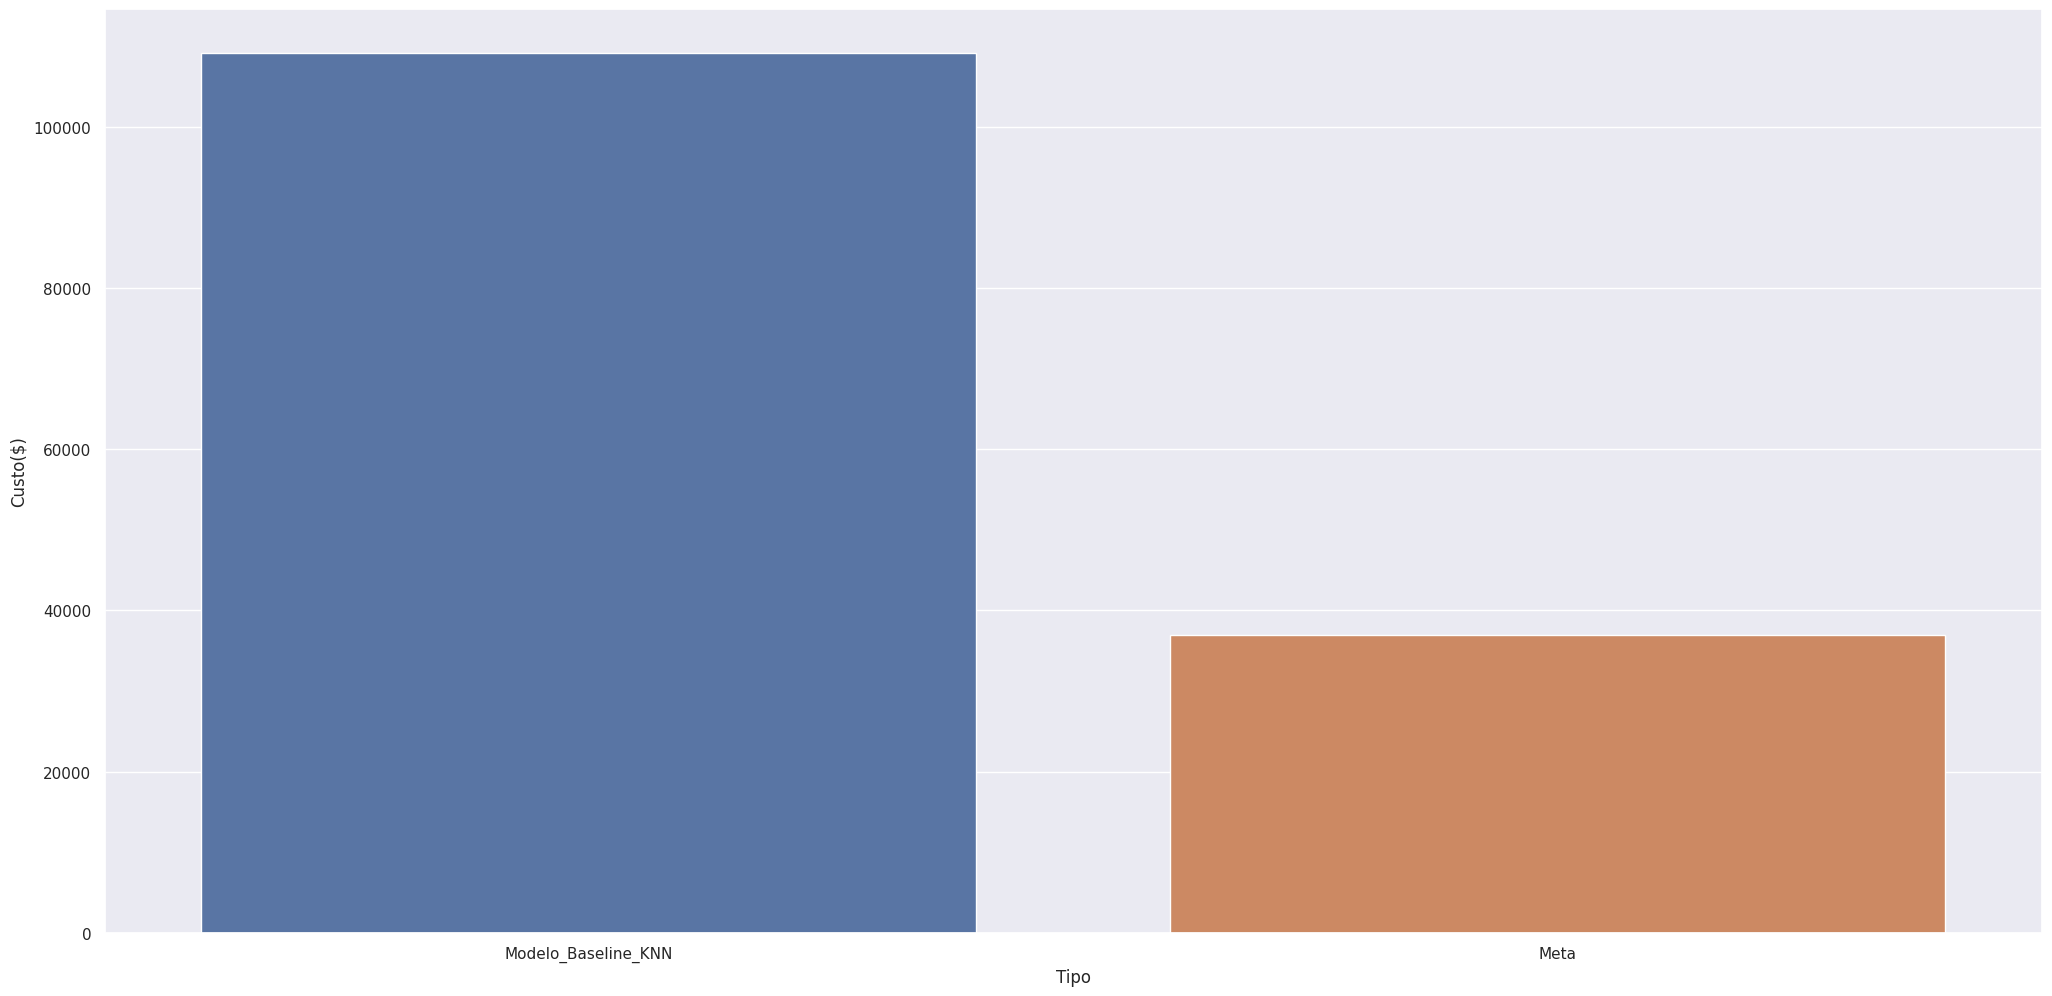

In [72]:
sns.barplot(x='Tipo',y='Custo($)',data=df_impacto);

* Portanto, para o nosso primeiro ciclo de desenvolvimento obtivemos como resultado um modelo baseline utilizando KNN que por enquanto não resolveu o problema de custo dos sistema de manutenção do sistemas de ar.

## Atividades para o próximo ciclo.

* Padronização dos Dados usando Rescala.
* Testar outros Algoritmos de Classificação.
* Implementação de Cross_Validation para medir de maneira mais assertiva o desempenho dos modelos.
* Definição das métricas de perfomance do modelo ( Métricas para modelo / Métricas para Negócio) .


